In [81]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

---

## Data Loading and Ingestion

---

In [82]:
mobile_usage_beh= pd.read_csv('Data\mobile_usage_behavioral_analysis.csv', index_col=0)

In [83]:
mobile_usage_beh.head()

,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
User_ID,,,,,,,,,
1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


In [84]:
mobile_usage_beh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1000 non-null   int64  
 1   Gender                        1000 non-null   object 
 2   Total_App_Usage_Hours         1000 non-null   float64
 3   Daily_Screen_Time_Hours       1000 non-null   float64
 4   Number_of_Apps_Used           1000 non-null   int64  
 5   Social_Media_Usage_Hours      1000 non-null   float64
 6   Productivity_App_Usage_Hours  1000 non-null   float64
 7   Gaming_App_Usage_Hours        1000 non-null   float64
 8   Location                      1000 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 78.1+ KB


In [85]:
mobile_usage_beh.describe()

,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,38.745000,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410
std,12.186734,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362
min,18.000000,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000
25%,28.000000,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000
50%,40.000000,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000
75%,50.000000,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500
max,59.000000,11.970000,14.000000,29.00000,4.990000,5.000000,5.000000


In [86]:
print(mobile_usage_beh.info())
print(mobile_usage_beh.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1000 non-null   int64  
 1   Gender                        1000 non-null   object 
 2   Total_App_Usage_Hours         1000 non-null   float64
 3   Daily_Screen_Time_Hours       1000 non-null   float64
 4   Number_of_Apps_Used           1000 non-null   int64  
 5   Social_Media_Usage_Hours      1000 non-null   float64
 6   Productivity_App_Usage_Hours  1000 non-null   float64
 7   Gaming_App_Usage_Hours        1000 non-null   float64
 8   Location                      1000 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 78.1+ KB
None
               Age  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
count  1000.000000            1000.000000              1000.000000   
mean     38.745000               6.405670 

---

## Descriptive Analyses


---

In [87]:
print(mobile_usage_beh.isnull().sum())


Age                             0
Gender                          0
Total_App_Usage_Hours           0
Daily_Screen_Time_Hours         0
Number_of_Apps_Used             0
Social_Media_Usage_Hours        0
Productivity_App_Usage_Hours    0
Gaming_App_Usage_Hours          0
Location                        0
dtype: int64


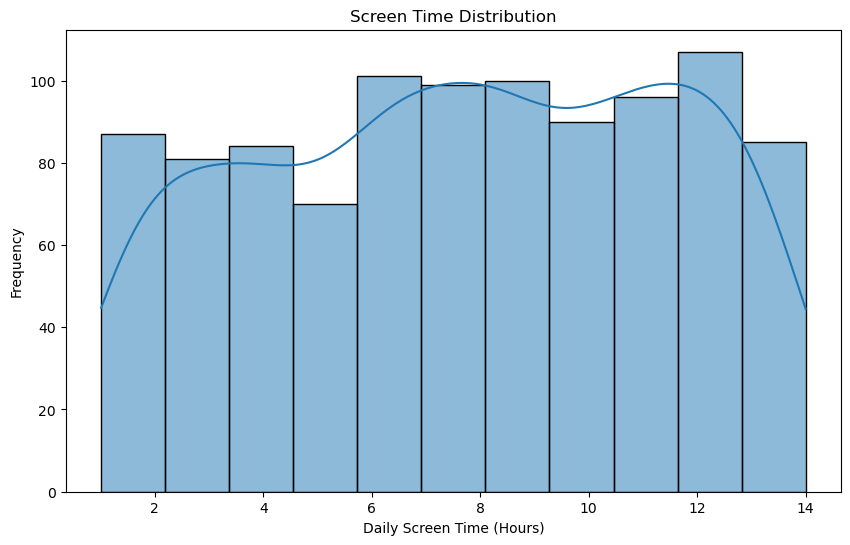

In [88]:
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(mobile_usage_beh['Daily_Screen_Time_Hours'], kde=True)
plt.title("Screen Time Distribution")
plt.xlabel("Daily Screen Time (Hours)")
plt.ylabel("Frequency")
plt.show()



In the image, we see that the screen time values ​​​​varying between 2 hours and 14 hours are distributed with different frequencies. The screen time with the highest frequency is around 6-8 hours.

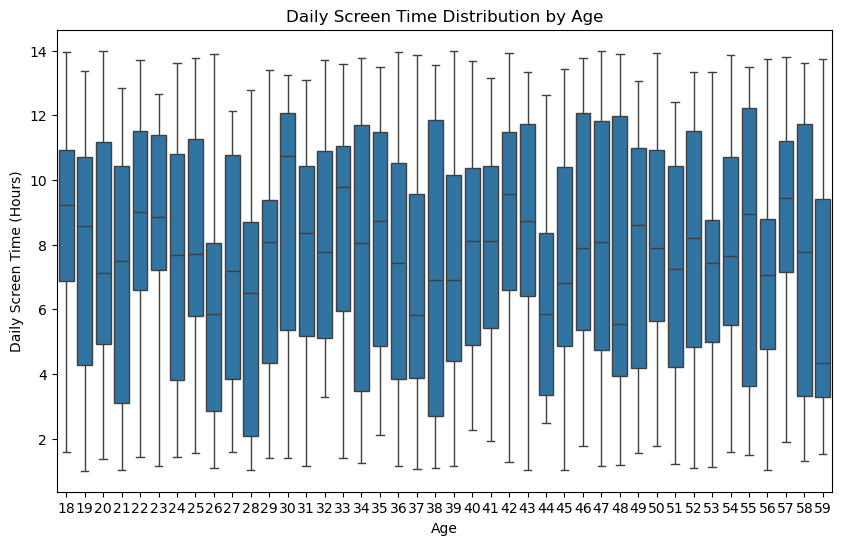

In [89]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Daily_Screen_Time_Hours', data=mobile_usage_beh)
plt.title("Daily Screen Time Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Daily Screen Time (Hours)")
plt.show()

In [90]:
# Yaş gruplarını oluşturma
mobile_usage_beh['Age_Group'] = pd.cut(mobile_usage_beh['Age'], bins=[18, 30, 45, 60], labels=['Genç', 'Orta Yaş', 'İleri Yaş'])

# Yaş gruplarına göre ortalama ekran süresi
age_group_screen_time = mobile_usage_beh.groupby('Age_Group')['Daily_Screen_Time_Hours'].mean()
print(age_group_screen_time)

# Cinsiyete göre ekran süresi ve uygulama kullanımı
gender_screen_time = mobile_usage_beh.groupby('Gender')['Daily_Screen_Time_Hours'].mean()
print(gender_screen_time)

# Şehir bazlı ekran süresi analizi
location_screen_time = mobile_usage_beh.groupby('Location')['Daily_Screen_Time_Hours'].mean().sort_values()
print(location_screen_time)

Age_Group
Genç         7.637899
Orta Yaş     7.689263
İleri Yaş    7.678169
Name: Daily_Screen_Time_Hours, dtype: float64
Gender
Female    7.632464
Male      7.755957
Name: Daily_Screen_Time_Hours, dtype: float64
Location
New York       7.397119
Houston        7.452928
Los Angeles    7.599081
Phoenix        7.948543
Chicago        8.136667
Name: Daily_Screen_Time_Hours, dtype: float64


In [91]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting features
features = mobile_usage_beh[['Daily_Screen_Time_Hours', 'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours']]

# Standardizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
mobile_usage_beh['KMeans_Cluster'] = kmeans.fit_predict(features_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
mobile_usage_beh['DBSCAN_Cluster'] = dbscan.fit_predict(features_scaled)





c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


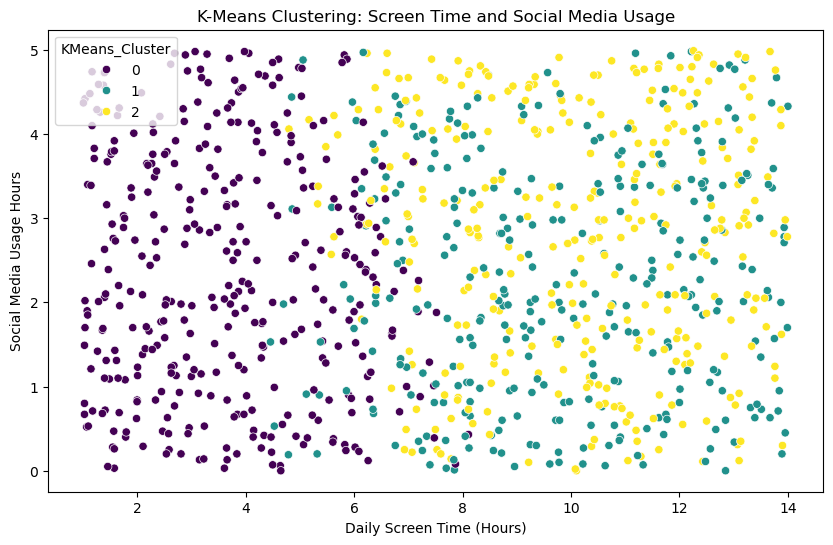

In [92]:
# Visualizing K-means results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mobile_usage_beh['Daily_Screen_Time_Hours'], y=mobile_usage_beh['Social_Media_Usage_Hours'], hue='KMeans_Cluster', data=mobile_usage_beh, palette="viridis")
plt.title("K-Means Clustering: Screen Time and Social Media Usage")
plt.xlabel("Daily Screen Time (Hours)")
plt.ylabel("Social Media Usage Hours")
plt.show()

In [93]:
demographic_analysis = mobile_usage_beh.groupby('KMeans_Cluster').agg({
    'Age': 'mean',
    'Gender': lambda x: x.mode()[0],  # Mode is used to get the most common gender in each cluster
    'Location': lambda x: x.mode()[0],  # Mode to get the most common location in each cluster
    'Daily_Screen_Time_Hours': 'mean',
    'Social_Media_Usage_Hours': 'mean',
    'Productivity_App_Usage_Hours': 'mean',
    'Gaming_App_Usage_Hours': 'mean'
}).reset_index()

# Display demographic analysis
print(demographic_analysis)

   KMeans_Cluster        Age  Gender  Location  Daily_Screen_Time_Hours  \
0               0  39.055402    Male  New York                 3.674294   
1               1  38.605678    Male  New York                 9.822461   
2               2  38.534161  Female  New York                10.112329   

   Social_Media_Usage_Hours  Productivity_App_Usage_Hours  \
0                  2.349335                      2.367396   
1                  2.236940                      3.917003   
2                  2.792267                      1.238975   

   Gaming_App_Usage_Hours  
0                2.545319  
1                2.404196  
2                2.467143  


Gender          Female  Male
KMeans_Cluster              
0                  176   185
1                  141   176
2                  166   156


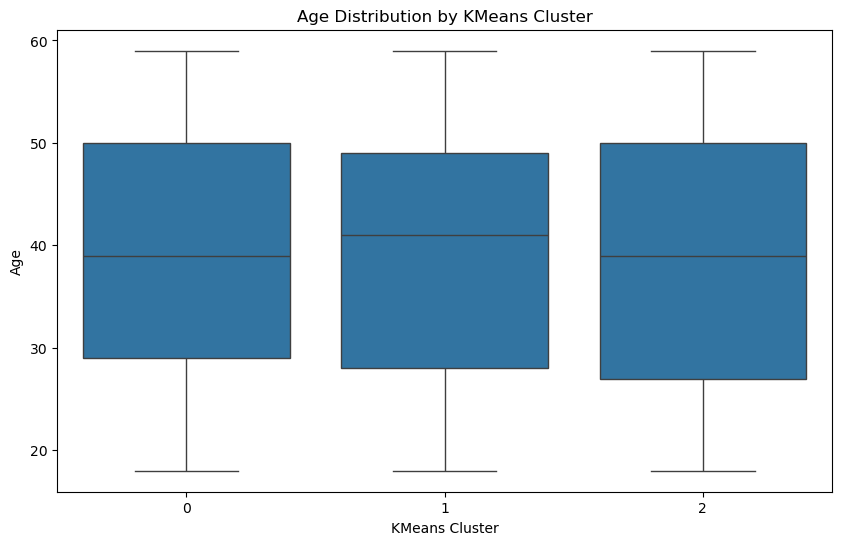

In [94]:
gender_distribution = mobile_usage_beh.groupby(['KMeans_Cluster', 'Gender']).size().unstack()
print(gender_distribution)

# Yaş dağılımı
plt.figure(figsize=(10, 6))
sns.boxplot(x='KMeans_Cluster', y='Age', data=mobile_usage_beh)
plt.title("Age Distribution by KMeans Cluster")
plt.xlabel("KMeans Cluster")
plt.ylabel("Age")
plt.show()

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_22352\2512030998.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y='Social_Media_Usage_Hours', data=mobile_usage_beh, ci=None)


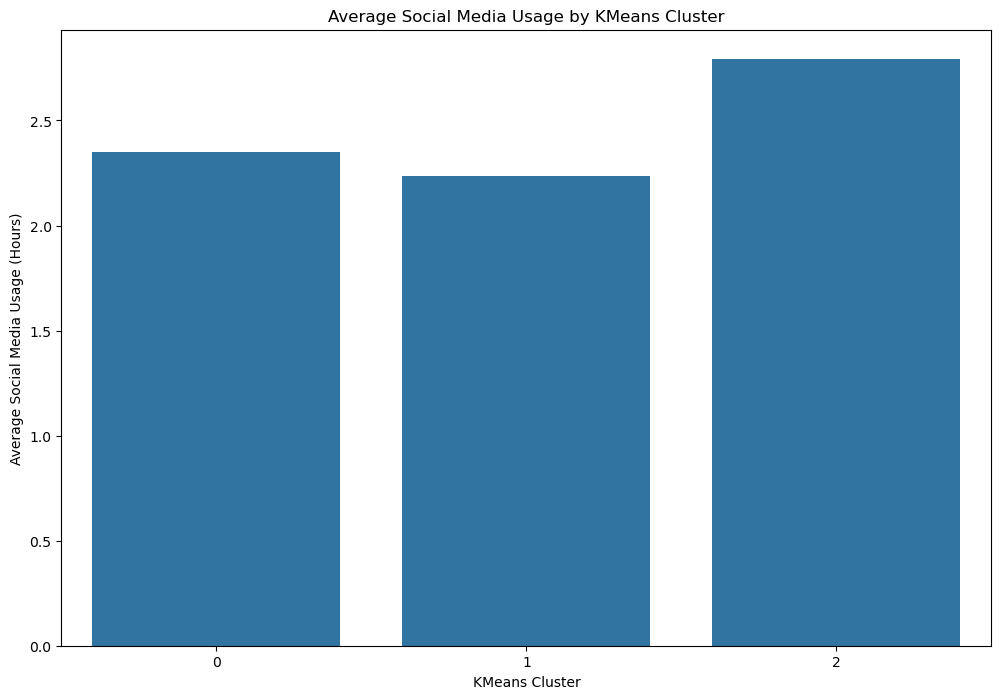

In [95]:
plt.figure(figsize=(12, 8))
sns.barplot(x='KMeans_Cluster', y='Social_Media_Usage_Hours', data=mobile_usage_beh, ci=None)
plt.title("Average Social Media Usage by KMeans Cluster")
plt.xlabel("KMeans Cluster")
plt.ylabel("Average Social Media Usage (Hours)")
plt.show()

I would focus on Cluster 2 – Social Media Focused Users, as this group has the highest averages for daily screen time and social media usage, meaning they spend more time on the platform and are more engaged.